# TABLE OF CONTENTS
> [INTRODUCTION](#INTRODUCTION)
> >[1. Background & Goals](#1.-Background-&-Goals)
>
> >[2. Quality Assessment of Data Collection](#2.-Quality-Assessment-of-Data-Collection)
> [TUTORIAL](#TUTORIAL)
> 
> > [1. Collecting the Data](#1.-Collecting-the-Data)
> >> >
> > > [1.1. Method One: Miller Center API](#1.1.-Method-One:-Miller-Center-API)
> > >
> > > [1.2. Method Two: Web Scraping](#1.2.-Method-Two:-Web-Scraping)
> > > 
> > > [1.3. Which Method Is Better?](#1.3.-Which-Method-Is-Better?)
> 
> > [2. Preprocess the Data](#2.-Preprocess-the-Data)
> >
> > > [2.1. Cleaning the Transcripts](#2.1.-Cleaning-the-Transcripts)
> > >
> > > [2.2. Standardize the Date](#2.2.-Standardize-the-Date)
>
> > > [2.3. Text Reduction - Tokenization & Lemmatization](#2.3.-Text-Reduction---Tokenization-&-Lemmatization)
> > >
> > [3. Analyzing the Data](#3.-Analyzing-the-Data)
> >
> > > [3.1. Assign Topics to Each Speech](#3.1.-Assign-Topics-to-Each-Speech)
> > >
> > > [3.2. Text Annotation - Part of Speech Tagging (POS) & Named Entity Recognition (NER)](#3.2.-Text-Annotation---Part-of-Speech-Tagging-(POS)-&-Named-Entity-Recognition-(NER))
> > >
> > > [3.3. Analyze the POS and NER](#3.3.-Analyze-the-POS-and-NER)
> > >

> 
> [ACTIVE EXERCISE](#ACTIVE-EXERCISE)
> >
> > [1. Creating Your Own Dataset](#1.-Creating-Your-Own-Dataset)
> >
> > [2. Preprocess Your Data](#2.-Preprocess-Your-Data)
> >
> > [3. Come up with Your Research Questions & Analyzing the Data](#3.-Come-up-with-Your-Research-Questions-&-Analyzing-the-Data)
> >> >
> 
> [REFERENCE](#REFERENCE)



# INTRODUCTION
## 1. Background & Goals
Political speech plays a vital role in comprehending political discourse, as it provides valuable insights into power dynamics and conflicts within a society. The language utilized by politicians, known as political discourse, serves as a potent tool for constructing a favorable and widely accepted self-representation or public perception (Neshkovska, 2019). By examining the main topics in presidential speeches and how presidents adapt their speeches and rhetoric to address these topics, researchers can gain insights into the shifts in public opinion, power dynamics, and conflicts within society.

In this project, we delve into the speeches of Joe Biden, the current President of the United States, to gain a deeper understanding of the prominent topics discussed and their evolution from 2021 to 2023. This allows us to capture the recent developments and changes in political discourse. 

Our goal is to collect and analyze 21 speeches delivered by Joe Biden to uncover the underlying themes and trends in his speeches. We will employ computational techniques like the natural language processing and machine learning algorithms. Through topic modeling, we will uncover the latent themes within Biden's speeches, providing a comprehensive overview of the issues he has addressed. By analyzing the parts of speech and named entities, we will gain a deeper understanding of the linguistic patterns and the entities that Biden frequently references. By doing so, we aim to shed light on the key issues that have captured Biden's attention and how they have potentially shifted over time.
## 2. Quality Assessment of Data Collection
We started by collecting [21 speeches](https://millercenter.org/the-presidency/presidential-speeches?field_president_target_id[30721]=30721) delivered by Joe Biden from the renowned nonpartisan affiliate of the University of Virginia, the [Miller Center](https://millercenter.org/about/who-we-are). The nonpartisan nature of the Miller Center ensures that the data collected is free from biases. This institution specializes in presidential scholarship and provides valuable insights into American political history. The speeches available on the Miller Center's platform are widely recognized as some of the most famous and representative, offering a comprehensive perspective on Biden's presidency. This allows us to gain comprehensive perspective on his leadership style, policy proposals, and vision for the nation.
#### Ethical Consideration
The [Miller Center](https://data.millercenter.org/) states that the speeches in their collection are in the public domain. They provide access to the data without requiring any form of authentication. 
#### Original Source
The transcripts available on the Miller Center website were obtained from the [White House](https://www.whitehouse.gov/briefing-room/speeches-remarks/) (WH). While the speech transcripts are available from news outlets, such as the [New York Times](https://www.nytimes.com/search?dropmab=false&query=biden%20speech%20transcript&sort=best) (NYT), it's important to recognize that news outlets can have different perspectives and biases. On the other hand, the White House is a reliable source for official transcripts of presidential speeches. The White House website publishes these transcripts, which are usually reviewed and approved by White House staff before being made publicly available.
#### Cross-Reference
However, to ensure the reliability and authenticity of the information, it is still beneficial to cross-reference multiple sources. We use the New York Times as a source to cross-reference due to its rigorous fact-checking and journalistic standards. To conduct this cross-referencing, three sample speeches were randomly selected, and their transcripts were compared using Voyant tools.

The Voyant tools ([NYT](https://voyant-tools.org/?corpus=ea98454f11bdf91d74ee4cbd11fbe1b7) & [WH](https://voyant-tools.org/?corpus=79526e4bc5af13602c5f41927995a48a)) allowed us to analyze the most frequent words, vocabulary density, readability, and general topics in the transcripts. Although there were slight variations in the readability index, the overall findings revealed consistency in word frequencies, vocabulary densities, and similar topics across both sources. This suggests that the content of the speeches is consistently represented in different transcripts.
##### NYT
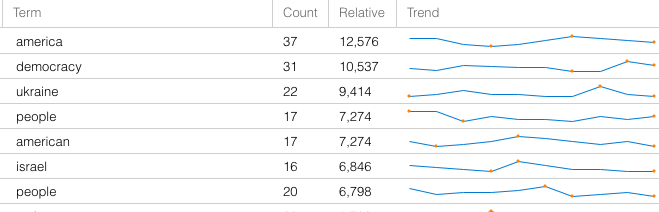
##### WH
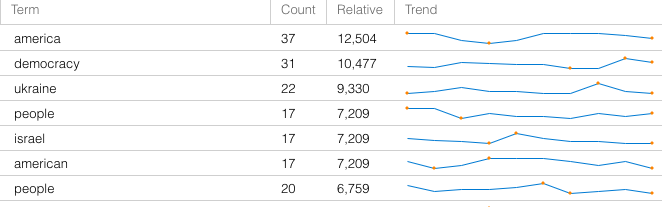
##### NYT
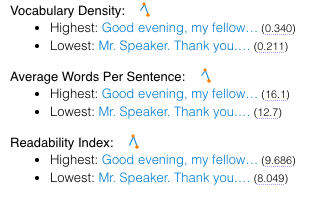
##### WH
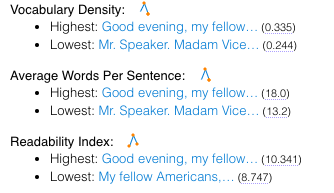
##### NYT
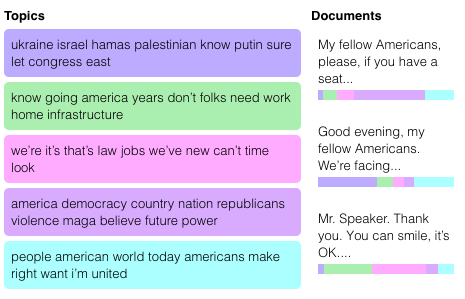
##### WH
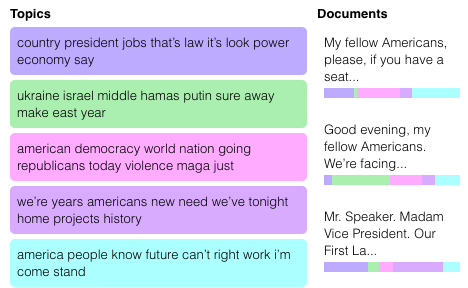

While Voyant tools offer useful insights into vocabulary density and readability, it's important to acknowledge that they may not encompass all aspects of the speeches' content. Nonetheless, the findings support the credibility of the transcripts and enhance our understanding of the speeches.

# TUTORIAL
## 1. Collecting the Data
### 1.1. Method One: Miller Center API
We will be using the [Miller Center API](https://data.millercenter.org/api.html) to collect data related to speeches by Joe Biden. 

In [6]:
# Import necessary libraries
import pandas as pd
import requests

In [10]:
# We start by making a POST request to the API endpoint. This returns the speech data in JSON format.
endpoint = "https://api.millercenter.org/speeches?filter_president=Joe+Biden"
r = requests.post(url=endpoint)
data = r.json()
items = data['Items']

In [12]:
# Next, we check if there is a 'LastEvaluatedKey' in the response data, indicating that there are more items to retrieve. If so, we continue making POST requests to the API with the 'continue_president' and 'continue_doc_name' parameters to fetch the remaining items.
while 'LastEvaluatedKey' in data:
    continue_president = data['LastEvaluatedKey']['president']
    continue_doc_name = data['LastEvaluatedKey']['doc_name']
    
    r = requests.post(url=endpoint, params={"continue_president": continue_president, "continue_doc_name": continue_doc_name})
    data = r.json()
    items += data['Items']

In [15]:
# For each speech item in the 'Items' list, we extract the title, president, date, and transcript. 
# We store this information in a list of dictionaries called `speeches`. 
speeches = []
for item in items:
    title = item['title']
    president = item['president']
    date = item['date']
    doc_name = item['doc_name']
    transcript = item['transcript']
    
    speech = {
        'Title': title,
        'President': president,
        'Date': date,
        'Transcript': transcript
    }
    speeches.append(speech)

# We create a pandas DataFrame using the `speeches` list. 
df = pd.DataFrame(speeches)

In [17]:
# Finally, we save it to a CSV file.
df.to_csv('Biden_presidential_speeches1.csv', index=False)

#### Data & Metadata (collecting from API)
Biden_presidential_speeches1.csv: this CSV file contains the speech title, president's name, date of the speech, and transcript of the speech. 

In [41]:
df1 = pd.read_csv('Biden_presidential_speeches1.csv')

In [42]:
df1

,Title,President,Date,Transcript
0,"April 28, 2021: Address to Joint Session of Co...",Joe Biden,2021-04-29,\r\nTHE PRESIDENT: Thank you. (Applause.) Than...
1,"August 16, 2021: Remarks on Situation in Afgha...",Joe Biden,2021-08-16,THE PRESIDENT: Good afternoon. I want to speak...
2,"August 26, 2021: Statement on Terror Attacks i...",Joe Biden,2021-08-26,THE PRESIDENT: Been a tough day. This evening ...
3,"August 31, 2021: Remarks on Ending the War in ...",Joe Biden,2021-08-31,"THE PRESIDENT: Last night in Kabul, the United..."
4,"February 21, 2023: Remarks on the One-Year Ann...",Joe Biden,2023-02-22,"THE PRESIDENT: Hello, Poland! One of our grea..."
5,"February 24, 2022: Remarks on the Russian Inva...",Joe Biden,2022-02-24,THE PRESIDENT: Sorry to keep you waiting. Good...
6,"February 7, 2023: State of the Union Address",Joe Biden,2023-02-08,Mr. Speaker. Madam Vice President. Our First L...
7,"January 20, 2021: Inaugural Address",Joe Biden,2021-01-20,"Chief Justice Roberts, Vice President Harris, ..."
8,"January 6, 2022: Remarks on the Anniversary of...",Joe Biden,2022-01-06,"VICE PRESIDENT: Fellow Americans, good morning..."
9,"July 8, 2021: Speech on the Drawdown of US For...",Joe Biden,2021-07-08,"THE PRESIDENT: Good afternoon. Earlier today, ..."


### 1.2. Method Two: Web Scraping
#### Libraries:
1. [requests](https://requests.readthedocs.io/en/latest/): the requests library offers a simple and elegant way to send HTTP requests. It is widely used in the Python and is one of the most downloaded packages.
2. [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/): BeautifulSoup is a good library for web scraping due to its simplicity, robust parsing capabilities, powerful parsing techniques, and integration with Requests.
#### Functions:
1. [Classes](https://docs.python.org/3/tutorial/classes.html): by defining a class, we can group related functions and data together. Once you define a class, you can create multiple instances of that class. In our example, we can create instances of "PresidentialSpeechScraper" for different presidents and scrape their speech data separately. This allows for easy reuse of the code.
2. [Constructor Method](https://www.digitalocean.com/community/tutorials/how-to-construct-classes-and-define-objects-in-python-3#the-constructor-method): our `__init__` method is the constructor method that initializes the instance of the "PresidentialSpeechScraper" class. It sets up the base URL, president ID, president name, and an empty list "speech_data_list" to store the extracted speech data.
3. "scrape_speech_links" function: this function is for scraping the links of speeches for a specific president. It constructs a URL by combining the base URL and the president ID. It sends a request to the URL, parses the response using BeautifulSoup, and extracts the speech links from the HTML. Each link is then added to the "speech_data_list" along with its associated title.
4. "scrape_speech_details" function: it iterates over each speech link in the "speech_data_list" and extracts additional details from the speech page. It sends a request to each speech link, parses the response using BeautifulSoup, and extracts the title, president name, date, summary, and the transcript text. 

In [ ]:
# import libraries
import requests
from bs4 import BeautifulSoup

In [4]:
# We define a class, and name it PresidentialSpeechScraper.
class PresidentialSpeechScraper:
    # Initialize the class; then define the basic URL, create the president_id, president_name, and speech_data_list in order to transfer or receive data later.
    def __init__(self, president_id, president_name):
        self.base_url = "https://millercenter.org/the-presidency/presidential-speeches"
        self.president_id = president_id
        self.president_name = president_name
        self.speech_data_list = []

    # Now we begin to scrape links of speeches.
    def scrape_speech_links(self):
        # Create a complete link for each specific president, 
        # using '?' as a query string to combain self.base_url with target self.president_id. 
        # Besides, '=' here represents only the relationship between the key and the value, 
        # not the assignment operation, which means the string of this key-value pair is used to tell the server 
        # about a particular parameter and its value.
        url = f"{self.base_url}?field_president_target_id[{self.president_id}]={self.president_id}"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        links = soup.find_all('div', class_='views-field views-field-title')

        for link in links:
            title = link.find('a').text
            speech_link = link.find('a')['href']
            self.speech_data_list.append({'Title': title, 'Link': speech_link})
    
    # Then we start to scrape more details in every speeches.
    def scrape_speech_details(self):
        for speech_data in self.speech_data_list:
            link = speech_data['Link']
            response = requests.get(link)
            soup = BeautifulSoup(response.text, 'html.parser')

            title = soup.find('h1').text.strip()
            president = soup.find('p', class_='president-name').text.strip()
            date = soup.find('p', class_='episode-date').text.strip()
            summary = soup.find('div', class_='about-sidebar--intro').p.text.strip()
            speech_elements = soup.find_all('div', class_='transcript-inner')
            # Connect all the texts in <div> and delete the possible 'Transcript' in texts/
            speech = '\n'.join([element.text.strip().replace("Transcript\n", "") for element in speech_elements])
            
            # Now we can add the information extracted from the speech details to the dictionary separately.
            speech_data.update({
                'Title': title,
                'President': president,
                'Date': date,
                'Summary': summary,
                'Transcript': speech
            })

    # Save the data above to a CSV file.
    def save_to_csv(self):
        filename= f"{self.president_name}_presidential_speeches2.csv"
        df = pd.DataFrame(self.speech_data_list)
        df.to_csv(filename, index=False)
        print(f"Speech data saved to {filename}")

In [5]:
# Create an instance of Biden for the class of PresidentialSpeechScraper. Each president has a unique id. 
Biden_scraper = PresidentialSpeechScraper(president_id=30721, president_name ='Biden')

Biden_scraper.scrape_speech_links()
Biden_scraper.scrape_speech_details()

Biden_scraper.save_to_csv()

Speech data saved to Biden_presidential_speeches.csv


#### Data & Metadata (collecting by web scraping)
Biden_presidential_speeches2.csv: this CSV file contains the speech title, link of speech, president's name, date of the speech, summary and transcript of the speech. 

In [44]:
df2 = pd.read_csv('Biden_presidential_speeches2.csv')

In [49]:
df2.head(1)

,Title,Link,President,Date,Summary,Transcript
0,"October 20, 2023: Remarks on the US Response i...",https://millercenter.org/the-presidency/presid...,Joe Biden,"October 20, 2023",President Biden addresses the American people ...,"Good evening, my fellow Americans. We’re facin..."


### 1.3. Which Method Is Better?
When collecting Biden's speech transcripts, you have two methods - utilizing the Miller Center API or employing web scraping techniques. Let's explore the advantages and limitations of each approach:

1. Miller Center API:
   - Advantages:
     - Official and reliable source. 
     - Structured data: The API delivers information in a structured format, such as JSON or XML, making it easier to extract specific details from the transcripts.
     - Efficient and convenient.

   - Limitations:
     - Limited availability: The API may not include all the desired information, such as the summary of transcripts.
     - [Access restrictions](https://data.millercenter.org/api.html): "Rate-limiting does apply to the API described in this document, so please exercise prudence in using it."

2. Web Scraping:
   - Advantages:
     - Flexibility and broad coverage: Web scraping allows you to collect various information from the html pages, such as the summary of transcripts, potentially providing a more comprehensive collection of Biden's speech transcripts.
     - Real-time data: Scraping the website directly enables you to access the most up-to-date transcripts available.

   - Limitations:
     - Data quality and reliability: Web scraping relies on the structure and consistency of the website being scraped. Changes in layout or formatting may impact the scraping process and result in incomplete or inaccurate data. It is worth noting that the Miller Center website structure changes frequently and sometimes the website does not display the speeches.

## 2. Preprocess the Data
### 2.1. Cleaning the Transcripts
Cleaning data is an essential step in data analysis. Even after removing leading and trailing white spaces in the process of web scraping, we found many unwanted characters such as newline characters (\n), carriage return characters (\r), and multiple consecutive spaces in our transcripts. These elements can hinder our analysis and make it more difficult to extract meaningful insights from the data. For example, they may disrupt the co-occurrence patterns of words and context. To address these issues, we need to remove or replace these unwanted characters. Also, it is better to remove non-alphanumeric characters like punctuation to increase the accuracy, as punctuation marks usually don't carry much semantic meanings. By removing punctuation, we can focus on the important words and entities in the text, which can lead to more accurate results. 

To accomplish this, we can utilize the `re` library. Additionally, we can employ the `replace()` method to remove specific substrings from the text. By thoroughly cleaning the text, we can created a more consistent dataset that is better suited for our subsequent analysis. 
#### 2.1.1. Library for Cleaning Data
[`re` library](https://docs.python.org/3/library/re.html): the "re" library is a powerful tool for working with regular expressions, which are patterns used to match and manipulate text. It allows you to replace specific patterns like non-alphanumeric characters, replace specific substrings with another substring, identify and replace multiple consecutive whitespace characters, etc.

In [38]:
import re

In [53]:
# We define a function to remove non-alphanumeric characters, newlines, carriage returns, and multiple consecutive spaces.
def clean_text(text):
    # Remove non-alphanumeric characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove newlines and carriage returns
    cleaned_text = cleaned_text.replace('\n', '').replace('\r', '')
    # Remove multiple consecutive spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text

In [54]:
# Then, we apply the cleaning function to a DataFrame column (Speech)
df1['Transcript'] = df1['Transcript'].apply(clean_text)
df2['Transcript'] = df2['Transcript'].apply(clean_text)

### 2.1.2. Removing Stop Words
[Stop words](https://github.com/Alir3z4/stop-words/blob/master/english.txt): for some parts of our project, we need to remove stop words. We use a conprehensive list stop words collected from various sources, including Stopwords ISO, and NLTK Stopwords. It can exclude meaningless words as much as possible and highlight words related to the main themes. 

1. [NLTK Stopwords](https://gist.github.com/sebleier/554280): The NLTK (Natural Language Toolkit) library in Python provides a collection of stop words for various languages, including English, Spanish, French, German, and more. This is a relatively small list and does not include adjectives and adverbs.

2. [Stopwords ISO](https://github.com/stopwords-iso): The Stopwords ISO project is a more comprehensive collection of stop words for different languages. It also covers a wide range of languages, including English, Spanish, French, German, Italian, Dutch, Portuguese, and many others.

### 2.2. Standardize the Date
Standardizing metadata is an important step in data analysis because it ensures consistency and allows for easier comparison. By standardizing the date format to year-month-day, we establish a uniform representation that is easily recognized by machines. Standardizing dates also enables chronological ordering, sorting in ascending or descending order. This is especially useful for tracking of trends and changes over time.

#### Data collected from API

In [43]:
# To standardize the date in the data collected from API, 
# we use the `parse()` function from the dateutil library.
# It can be used to parse the date string and convert it into a datetime object. 

from dateutil.parser import parse

# Then, you can use the `strftime()` function to format the datetime object into the desired date format. 
#`%Y-%m-%d` represents the year, month, and day in a four-digit year format, two-digit month, and two-digit day.

df1['Date'] = df1['Date'].apply(lambda x: parse(x).strftime('%Y-%m-%d'))

In [55]:
df1.head(1)

,Title,President,Date,Transcript
0,"April 28, 2021: Address to Joint Session of Co...",Joe Biden,2021-04-29,THE PRESIDENT Thank you Applause Thank you Tha...


#### Data collected from web scraping 

In [50]:
# We use the pd.to_datetime() function to convert the date to datetime data type.
# The format='%B sd, %Y' argument specifies the format of the date. 
# '%B' represents the full month name,
# 'sd' represents the day of the month with suffix (e.g., 1st, 2nd, 3rd),
# '%Y' represents the four-digit year.
# 'dt.date' is used to extract only the date part from the datetime object, discarding the time information.
df2['Date'] = pd.to_datetime(df2['Date'], format='%B %d, %Y').dt.date

In [68]:
df2.head(2)

,Title,Link,President,Date,Summary,Transcript
0,"October 20, 2023: Remarks on the US Response i...",https://millercenter.org/the-presidency/presid...,Joe Biden,2023-10-20,President Biden addresses the American people ...,Good evening my fellow Americans Were facing a...
1,"February 21, 2023: Remarks on the One-Year Ann...",https://millercenter.org/the-presidency/presid...,Joe Biden,2023-02-21,"Speaking at the Royal Castle in Warsaw, Poland...",THE PRESIDENT Hello Poland One of our great al...


As the data collected from web scraping containing more comprehensive information like the summary of the transcripts. we chose to save its cleaning format for later analysis.

In [69]:
# We used the title of each as index
df_index = df2.set_index('Title')
# Saving the cleaned transcripts with their metadata in the new csv. file. 
df_index.to_csv('Joe_Biden_speech_clean.csv')

### 2.3. Text Reduction - Tokenization & Lemmatization
Reducing the transcripts to tokens and lemmas is important before performing various analysis like part-of-speech (POS) tagging, named entity recognition (NER), and topic modeling using LDA.
1. Improved accuracy: reducing word variations to their base forms can ensure that same words are treated as the same entity. It establishes a consistent representation of the text, which contributes to identify similarities or differences between texts.
2. Dimensionality reduction: reducing the text to tokens and lemmas can reduce the overall dimensionality of the data. With fewer unique tokens, the algorithm like LDA can more efficiently identify and group words that contribute to specific topics.
3. Interpretability: lemmatizing the text ensures that words with the same root or base form are grouped together. This grouping enhances the interpretability of the analysis results. It becomes easier to identify common themes or topics when words with similar meanings or contextual relevance are grouped together.

#### 2.3.1. Library for Text Reduction
[spaCy](https://programminghistorian.org/en/lessons/corpus-analysis-with-spacy): it is a powerful and efficient natural language processing library that offers various features for text reduction tasks such as tokenization and lemmatization. It is known for its speed, robustness, and customizability. With pre-trained models for multiple languages. It is easy to set up and use, and its trained models and pipelines eliminate the need for multiple packages and functions. SpaCy performs better than NLTK in text-splitting tasks as it constructs syntactic trees for each sentence.

In [59]:
# Install and import spacy and plotly.
!pip install spaCy
!pip install plotly
!pip install nbformat==5.1.2

  Using cached nbformat-5.1.2-py3-none-any.whl (113 kB)
Reason for being yanked: Name generation process created inappropriate id values
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires nbformat==5.9.2, but you have nbformat 5.1.2 which is incompatible.
jupyter-server 2.10.0 requires nbformat>=5.3.0, but you have nbformat 5.1.2 which is incompatible.


In [60]:
# Import spacy
import spacy

# Install English language model
!spacy download en_core_web_sm

# Import os to upload documents and metadata
import os

# Load spaCy visualizer
from spacy import displacy

from spacy.matcher import Matcher

# Import pandas DataFrame packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Import graphing package
import plotly.graph_objects as go
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 13.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


##### Creating Doc Objects
To use spaCy, the first step is to load one of spaCy’s Trained Models and Pipelines 
We’ll use en_core_web_sm, which has been trained on written web texts. It may not perform as accurately as the those trained on medium and large English language models, but it will deliver results most efficiently. Once we’ve loaded en_core_web_sm, we can check what actions it performs; parser, tagger, lemmatizer, and NER, should be among those listed.

In [61]:
# Load nlp pipeline
nlp = spacy.load('en_core_web_sm')

# Check what functions it performs
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [70]:
# read the csv file containing the cleaning transcripts
df = pd.read_csv('Joe_Biden_speech_clean.csv')
df = df.set_index('Title')

In [71]:
# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp(text)

In [72]:
# Apply the function to the "Speech" column, so that the nlp pipeline is called on each speech
df['Doc'] = df['Transcript'].apply(process_text)

#### 2.3.2. Tokenization
Tokenization enables spaCy to parse the grammatical structures of a text and identify characteristics of each word.

In [73]:
# Define a function to retrieve tokens from a doc object
def get_token(doc):
    return [(token.text) for token in doc]

In [74]:
# Run the token retrieval function on the doc objects in the dataframe
df['Tokens'] = df['Doc'].apply(get_token)

#### 2.3.3. Lemmatization
Lemmatization is the retrieval of the dictionary root word of each word.

In [75]:
# Define a function to retrieve lemmas from a doc object
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

# Run the lemma retrieval function on the doc objects in the dataframe
df['Lemmas'] = df['Doc'].apply(get_lemma)
df.head(2)

,Link,President,Date,Summary,Transcript,Doc,Tokens,Lemmas
Title,,,,,,,,
"October 20, 2023: Remarks on the US Response in Support of Israel and Ukraine",https://millercenter.org/the-presidency/presid...,Joe Biden,2023-10-20,President Biden addresses the American people ...,Good evening my fellow Americans Were facing a...,"(Good, evening, my, fellow, Americans, Were, f...","[Good, evening, my, fellow, Americans, Were, f...","[good, evening, my, fellow, Americans, be, fac..."
"February 21, 2023: Remarks on the One-Year Anniversary of the Ukraine War",https://millercenter.org/the-presidency/presid...,Joe Biden,2023-02-21,"Speaking at the Royal Castle in Warsaw, Poland...",THE PRESIDENT Hello Poland One of our great al...,"(THE, PRESIDENT, Hello, Poland, One, of, our, ...","[THE, PRESIDENT, Hello, Poland, One, of, our, ...","[the, PRESIDENT, hello, Poland, one, of, our, ..."


In [76]:
# create a new transcript that is lemmatized and add it in a new column called joined_lemmas. This is used for topic modeling. 
df['joined_lemmas'] = df['Lemmas'].apply(lambda x: ' '.join(x))

In [77]:
# save the lemmatized transcripts in a new csv. file
df.to_csv('Joe_Biden_speech_lemmas.csv')

In [78]:
df.head(2)

,Link,President,Date,Summary,Transcript,Doc,Tokens,Lemmas,joined_lemmas
Title,,,,,,,,,
"October 20, 2023: Remarks on the US Response in Support of Israel and Ukraine",https://millercenter.org/the-presidency/presid...,Joe Biden,2023-10-20,President Biden addresses the American people ...,Good evening my fellow Americans Were facing a...,"(Good, evening, my, fellow, Americans, Were, f...","[Good, evening, my, fellow, Americans, Were, f...","[good, evening, my, fellow, Americans, be, fac...",good evening my fellow Americans be face an in...
"February 21, 2023: Remarks on the One-Year Anniversary of the Ukraine War",https://millercenter.org/the-presidency/presid...,Joe Biden,2023-02-21,"Speaking at the Royal Castle in Warsaw, Poland...",THE PRESIDENT Hello Poland One of our great al...,"(THE, PRESIDENT, Hello, Poland, One, of, our, ...","[THE, PRESIDENT, Hello, Poland, One, of, our, ...","[the, PRESIDENT, hello, Poland, one, of, our, ...",the PRESIDENT hello Poland one of our great al...


## 3. Analyzing the Data
### 3.1. Assign Topics to Each Speech
We want to create topic clusters to understand the relationship between different speeches based on shared topics. 
#### 3.1.1. Mehod: [Topic Modeling](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/09-Topic-Modeling-Without-Mallet.html)
1. [Topic modeling](https://tedunderwood.com/2012/04/07/topic-modeling-made-just-simple-enough/) is an unsupervised machine learning technique used to automatically categorize and find structure in a collection of documents. It aims to identify topics or themes within the documents based on word usage. The most popular topic modeling algorithm is Latent Dirichlet Allocation (LDA), which takes a collection of texts as input and returns a list of topics along with the prominent words associated with each topic. Each document is summarized as a mixture of these topics.
2. Motivation: while our purpose it to assign topics to each document and it is true that topic modeling represents documents as mixtures of topics, it still provides valuable insights into the underlying themes and and discover the latent topics within the speeches without needing prior knowledge. This helps in understanding the content distribution and gaining insights into the prominent themes discussed in the speeches. By applying topic modeling, we can found the prominent themes or subjects that Biden frequently addresses, allowing us to gain a comprehensive understanding of his politic priorities.
#### 3.1.2. Libraries for Topic Modeling
1. [tomotopy](https://github.com/bab2min/tomotopy): a valuable tool for topic modeling due to its speed, efficiency, support for various topic models. It can be a reliable choice for conducting topic modeling tasks efficiently and effectively.
2. [seaborn](https://seaborn.pydata.org/): it provides a high-level interface for drawing attractive and informative statistical graphics. We used it for visualizing our results.
3. [IPython.display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html): import the `Markdown` and `display` classes from the `IPython.display` module. These classes are used to display formatted text in a Jupyter Notebook

In [16]:
# install tomotopy
%pip install tomotopy little_mallet_wrapper

Note: you may need to restart the kernel to use updated packages.


In [223]:
# import necessary libraries
import tomotopy as tp
import little_mallet_wrapper
import seaborn as sns
from IPython.display import Markdown, display

In [224]:
# define functions to display the top documents related to a specific topic index,
# with the topic words formatted using Markdown syntax.

def make_md(string):
    # display a heading for the topic index and the corresponding topic words. 
    display(Markdown(str(string)))

def get_top_docs(docs, labels, ids, topic_distributions, topic_index, n=5):    
    # create a list of tuples, where each tuple contains the topic distribution, document, label, and document ID.
    # The list is sorted in reverse order based on the topic distribution value.
    sorted_data = sorted([(distribution[topic_index], document, label, docid) 
                          for distribution, document, label, docid
                          in zip(topic_distributions, docs, labels, ids)], reverse=True) 
    topic_words = topics[topic_index]
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")
    for probability, doc, label, docid in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
       # If the length of the `doc` exceeds 1000 characters, it is truncated and appended with ' [...]'.
        if len(doc) > 1000:
            doc = doc[:1000] + ' [...]'
        make_md(f'✨  \n**Topic Probability**: {probability:.3f}  **Label**: {label}  **ID**: {docid}\n\n**Document**: {doc}\n\n')
        # display the topic probability, label, document ID, and the modified `doc` string.

We define a function to to transform the transcripts in the dataframe into a single txt. file (TM_file.txt) in a format used by Mallet suitable for topic modeling (f"{doc_id}\t{label}\t{text}"), where each speech is separated by new lines and contains the necessary information (ID, date, transcript text) for analysis. We use date as label because we want to analyze the changes of topics over time. 

In [21]:
# read the csv. file with lemmatized transcipts
df = pd.read_csv('Joe_Biden_speech_lemmas.csv')

In [22]:
def write_txt_file(df):
    with open('TM_file.txt', 'w') as file:
        for i, row in df.iterrows():
            line = f"{i+1} \t {row['Date']} \t {row['joined_lemmas']}\n"
            file.write(line)
write_txt_file(df)

#### 3.1.3. Loading the Dataset & Removing Stop Words
Put the filename in the datasetfile variable. We download the [English stop words list](https://github.com/Alir3z4/stop-words/blob/master/english.txt) to process the transcripts. Yor can use different stop words lists for your language. 

[Stop words](https://github.com/Alir3z4/stop-words/blob/master/english.txt): this is a conprehensive list stop words collected from various sources, including [Stopwords ISO](https://github.com/stopwords-iso/stopwords-iso) and [NLTK Stopwords](https://www.nltk.org/). It can exclude meaningless words as much as possible and highlight words related to the main themes.

In [225]:
datasetfile = 'TM_file.txt'

stopwordsfile = 'english.txt'
# read the stop words list
with open(stopwordsfile) as inp:
    stop_words = inp.read().splitlines()

# read all speeches, separate each individual speech as a document, put id, date, transcripts in different list
with open(datasetfile) as inp:
    lines = inp.read().splitlines()
    training_data = []
original_texts = []
labels = []
ids = []
for line in lines:
    try:
        docid, label, text = line.strip().split('\t', 2)
    except ValueError:
        continue
    # process the orginal text
    processed_text = little_mallet_wrapper.process_string(
            text, numbers='remove',
             stop_words=stop_words,
            stop_words_extra=[])
    if not processed_text.strip():  # skip empty documents
        continue
    training_data.append(processed_text)
    original_texts.append(text)
    labels.append(label)
    ids.append(docid)

little_mallet_wrapper.print_dataset_stats(training_data)
len(training_data), len(original_texts), len(labels)

Number of Documents: 21
Mean Number of Words per Document: 1393.5
Vocabulary Size: 7057


(21, 21, 21)

#### 3.1.4. Training the Topic Model
We train different models with different numbers of topics (from 5 to 15) and times of iterations. The log-likelihood indicates how well the model has been trained. We increase the number of iterations until the difference in the log likelihood between iterations is small (500 times), which means that the model has converged. We decide to use the model with 10 topics and 500 times of iterations because compared with other models, this model consistently achieves high log likelihood values across different iterations, suggesting that the model is robust and reliable.

After training, the model is saved to disk. If you are satisfied with our model, do not run this cell, but instead download the topicmodel.bin and run the following cells. 

In [52]:
# Number of topics to return
num_topics = 10
# Number of training iterations
iterations = 500

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())
    
print("Topic Model Training...\n\n")
for i in range(0, iterations + 1, 10):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
model.save('topicmodel.bin')
print('done.')

Topic Model Training...


Iteration: 0	Log-likelihood: -8.617237044502398
Iteration: 10	Log-likelihood: -8.564310041556167
Iteration: 20	Log-likelihood: -8.582521583155783
Iteration: 30	Log-likelihood: -8.567766652573379
Iteration: 40	Log-likelihood: -8.560980963274764
Iteration: 50	Log-likelihood: -8.583830138905196
Iteration: 60	Log-likelihood: -8.567356794855638
Iteration: 70	Log-likelihood: -8.547248217997744
Iteration: 80	Log-likelihood: -8.582001511452587
Iteration: 90	Log-likelihood: -8.567804019332966
Iteration: 100	Log-likelihood: -8.558912172147718
Iteration: 110	Log-likelihood: -8.573303535979846
Iteration: 120	Log-likelihood: -8.576215380043282
Iteration: 130	Log-likelihood: -8.585169907163333
Iteration: 140	Log-likelihood: -8.563936295204206
Iteration: 150	Log-likelihood: -8.5675212266
Iteration: 160	Log-likelihood: -8.567220601233862
Iteration: 170	Log-likelihood: -8.57994878619396
Iteration: 180	Log-likelihood: -8.563649560093673
Iteration: 190	Log-likelihood: -8.5782530

In [226]:
# Load model from disk
model = tp.LDAModel.load('topicmodel.bin')
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

#### 3.1.5. Inspecting Topics

In [227]:
# Numer of topic words to print out
num_topic_words = 15

print("Topic Model Results:\n")
# Print out top 15 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨  {topic_words}")

Topic Model Results:

✨Topic 0✨  black white school community laughter night hate happen greenwood share assault overcome story wealth gods
✨Topic 1✨  afghanistan president military force taliban afghan mission continue troop attack terrorist fight agreement government risk
✨Topic 2✨  united country support war security threat partner nation food global history choose woman americas bring
✨Topic 3✨  ukraine russia putin russian nato president sanction freedom ukrainian russias europe continue fight ally force
✨Topic 4✨  american job america build plan pass percent create family pay applause americans investment economy congress
✨Topic 5✨  democracy america nation election vote history violence defend president soul challenge truth capitol justice liberty
✨Topic 6✨  americans covid school month vaccinate vaccine protect increase parent economic child shot plan business require
✨Topic 7✨  people american day time stand life speak meet live lose leader law power god include
✨Topic 8✨  pre

#### 3.1.6. Summarize Topics 
1. Topic 0: Racial Injustice & Community: discussing issues related to racial inequality, community issues, education, hate crimes, and wealth disparities.
2. Topic 1: Afghanistan & Military Mission: regarding the American troops in Afghanistan and Taliban terrorist.
3. Topic 2: International Engagement: United States' engagement in global issues. It mentions war, security threats, partner nations, food, history, and the importance of empowering women.
4. Topic 3: Ukraine-Russia Conflict: It references President Putin, NATO, sanctions, freedom, Ukrainian fight, and the role of Europe and allies.
5. Topic 4: American Jobs & Economy: regarding job plans, support American families, tax policies.
6. Topic 5: Democracy & Elections: the importance of democracy, the nation's history, election violence, and the Capitol incident.
7. Topic 6: COVID-19 Pandemic: highlights the impact of COVID-19 on Americans, particularly in terms of education and the economy. It mentions schools, vaccination, protecting against the virus, economic concerns, children, shots, business plans, and requirements.
8. Topic 7: American Identity: emphasizing the power of the American people.
9. Topic 8: Presidential Decisions & International Agreements: relations with China, border, changes and children.
10. Topic 9: Healthcare & Laws: regarding healthcare, drug laws, gun control, cutting expenses, cancer treatment, pricing, national expenditure, and wealth disparities

In [228]:
# Put the topic weights of each speech into a DataFrame
# Columns are topics, rows are speeches, each value is a topic weight.
columns = ['t%d: %s' % (topic_number,
        ' '.join(word for word, _prob in model.get_topic_words(topic_id=topic_number, top_n=5)))
    for topic_number in range(model.k)]
weight = pd.DataFrame([doc.get_topic_dist() for doc in model.docs],
             index=labels,
             columns=columns)
weight.head(2)

,t0: black white school community laughter,t1: afghanistan president military force taliban,t2: united country support war security,t3: ukraine russia putin russian nato,t4: american job america build plan,t5: democracy america nation election vote,t6: americans covid school month vaccinate,t7: people american day time stand,t8: president people talk time leave,t9: tonight cost law drug health
2023-10-20,0.055716,0.073676,0.150939,0.324693,0.067495,0.067203,0.024549,0.200110,0.019166,0.016454
2023-02-21,0.009824,0.003569,0.150139,0.415422,0.015478,0.111451,0.013254,0.256397,0.017619,0.006847


In [229]:
# Convert the date columns to datetime format
weight.index = pd.to_datetime(weight.index)

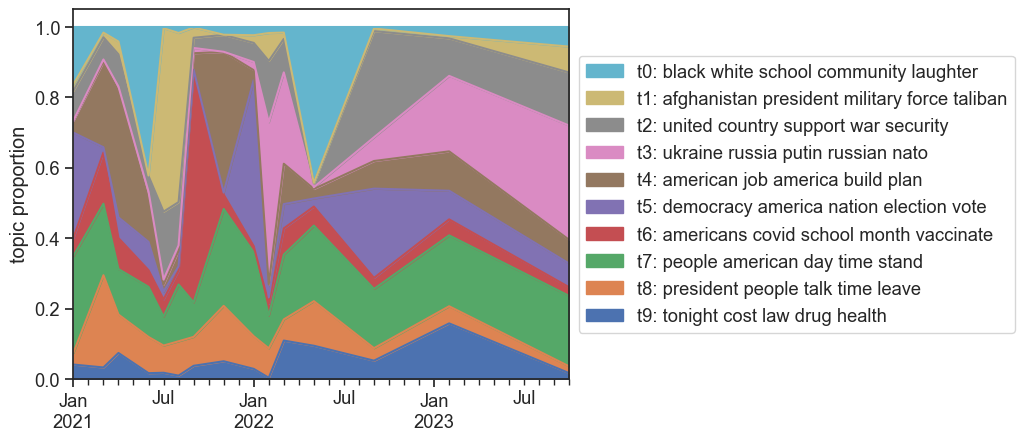

In [230]:
# Shows the average proportion of speeches across all topics per month
tp = weight.sum().index[::-1]
prop = (weight.loc[:, tp].T / weight.loc[:, tp].sum(axis=1)).T
ax = prop.dropna().groupby(prop.index.to_period('m')).mean(
        ).plot.area(stacked=True, ylabel='topic proportion')
# reverse legend order to match plot
handles, legendlabels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(legendlabels), loc='center left', bbox_to_anchor=(1.0, 0.5))

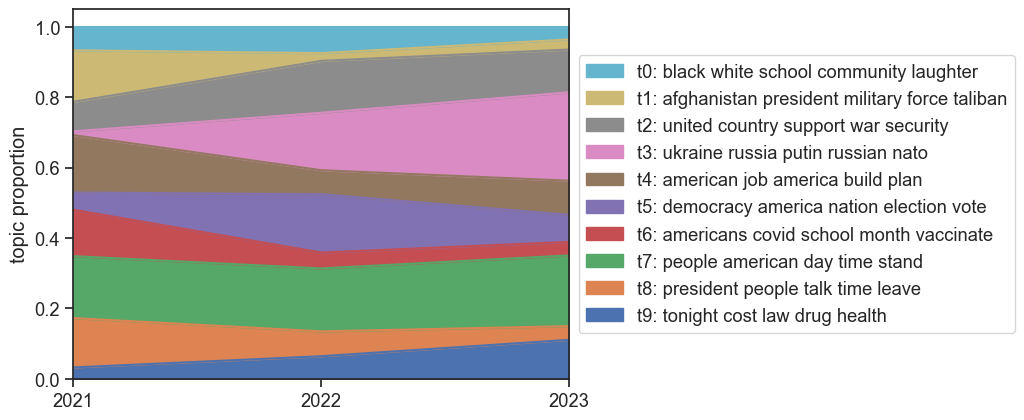

In [88]:
# Shows the average proportion of speeches across all topics per year
tp = weight.sum().index[::-1]
prop = (weight.loc[:, tp].T / weight.loc[:, tp].sum(axis=1)).T
ax = prop.dropna().groupby(prop.index.to_period('y')).mean(
        ).plot.area(stacked=True, ylabel='topic proportion')
handles, legendlabels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(legendlabels), loc='center left', bbox_to_anchor=(1.0, 0.5))

From the plots, we can see that Biden's topic focus in his speeches has changed over time. It is also worth noting that the topic of American identity was discussed throughout all three years. 

Throughout 2021, there was a consistent emphasis on democracy, elections, international engagement, the COVID-19 pandemic, Afghanistan and military missions, and the economy and job market. In the first half of 2021, the focus was particularly on the economy and job market, along with presidential decisions and international agreements. 

In the second half of 2022, the focus was primarily on healthcare and law, along with democracy, elections, and international engagement. Racial inequality and community issues were mentioned in the first half of 2022, along with the ongoing Ukrainian Russia conflict. 

In 2023, the main focus shifted to the Ukrainian Russia conflict, with mentions of Afghanistan and military missions. In the first half of 2023, the focus included healthcare and law. 

These findings might suggest that Biden's speech topics are influenced by current events and issues, with a focus on both domestic concerns (such as healthcare, law, racial inequality, and the economy) and international matters (such as democracy, elections, and conflicts like the Ukrainian Russia conflict). The consistent mention of American identity indicates the importance of national identity and values in Biden's speeches.

#### 3.1.7. Annotation: Assign a Topic to Each Speech
1. Topic modeling:find the main topic of each speech based on the topic weights of each speech. 
2. Manual evaluation: to verify the accuracy of the topics, it is essential to perform manual evaluation by close reading the speeches. Manually reading the speeches allows us to confirm if the identified topics align with our domain knowledge and expectations. It also enables a deeper understanding of the context within each speech. 

id: 1 
date:  2023-10-20 
2023-10-20
t0: black white school community laughter           0.055716
t1: afghanistan president military force taliban    0.073676
t2: united country support war security             0.150939
t3: ukraine russia putin russian nato               0.324693
t4: american job america build plan                 0.067495
t5: democracy america nation election vote          0.067203
t6: americans covid school month vaccinate          0.024549
t7: people american day time stand                  0.200110
t8: president people talk time leave                0.019166
t9: tonight cost law drug health                    0.016454
Name: 2023-10-20 00:00:00, dtype: float32


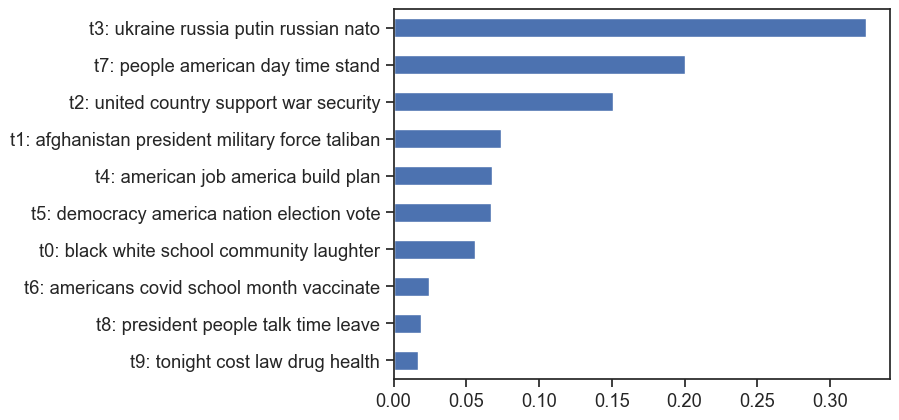

In [89]:
# Find the top one topic of each speech
# The topics for a particular document:
doc = 0
print('id:', ids[doc])
print('date:', labels[doc])
print(df.iloc[doc, 1]) # print the summary of the speech for contextual analysis 
#print('text:', original_texts[doc], '\n') # print the transcript for contextual analysis
print(weight.iloc[doc, :])
weight.iloc[doc, :].sort_values().plot.barh();

In [2]:
df_tp = pd.read_csv('Joe_Biden_speech_lemmas.csv')

In [3]:
# add a new column "Topic" and assign a topic to each speech
df_tp.loc[[0,1,3,6,8], 'Topic'] = 'Ukraine-Russia Conflict'  
df_tp.loc[[2,7,10,16,17], 'Topic'] = 'American Jobs & Economy'  
df_tp.loc[[4,9,20], 'Topic'] = 'Democracy & Elections' 
df_tp.loc[[11,19], 'Topic'] = 'COVID-19 Pandemic' 
df_tp.loc[[12,13,14], 'Topic'] = 'Afghanistan & Military Mission'
df_tp.loc[[15], 'Topic'] = 'Racial Injustice' 
df_tp.loc[[5], 'Topic'] = "School Assault"
df_tp.loc[[18], 'Topic'] = "American People & Presidency"

In [4]:
# Delete inflormation that is not useful for further analysis
columns_to_delete = ['Link', 'President']
df_tp = df_tp.drop(columns_to_delete, axis=1)

In [5]:
# Set index and save the csv. file with the annotation of topics 
df_tp = df_tp.set_index('Title')
df_tp.to_csv('Joe_Biden_speech_topic_annotated.csv')

In [83]:
df

,Title,Date,Summary,Transcript,Doc,Tokens,Lemmas,joined_lemmas,Topic
0,"October 20, 2023: Remarks on the US Response i...",2023-10-20,President Biden addresses the American people ...,Good evening my fellow Americans Were facing a...,Good evening my fellow Americans Were facing a...,"['Good', 'evening', 'my', 'fellow', 'Americans...","['good', 'evening', 'my', 'fellow', 'Americans...",good evening my fellow Americans be face an in...,Ukraine-Russia Conflict
1,"February 21, 2023: Remarks on the One-Year Ann...",2023-02-21,"Speaking at the Royal Castle in Warsaw, Poland...",THE PRESIDENT Hello Poland One of our great al...,THE PRESIDENT Hello Poland One of our great al...,"['THE', 'PRESIDENT', 'Hello', 'Poland', 'One',...","['the', 'PRESIDENT', 'hello', 'Poland', 'one',...",the PRESIDENT hello Poland one of our great al...,Ukraine-Russia Conflict


### 3.2. Text Annotation - Part of Speech Tagging (POS) & Named Entity Recognition (NER)
By applying POS analysis, we can analyze the frequency and distribution of different POS and important entities used in Biden's speeches. This can help identify the core of certain topics by examining the POS tags or NER associated with specific topics. 

POS analysis can assist in extracting key information or events from the text. For instance, by identifying proper nouns, you can extract the names of countries, conflicts, or specific policies mentioned in the speeches. 
NER helps in identifying and extracting important entities such as person names, organizations, locations, dates, and more from the speeches. This can provide valuable insights into the key actors, places, and events mentioned in the speeches. Both POS and NER can aid in understanding the the focus of each speech and how they relate to one another over time.


#### 3.2.1. Library for POS & Named Entity Recognition
[spaCy](https://programminghistorian.org/en/lessons/corpus-analysis-with-spacy)
1. spaCy facilitates two levels of part-of-speech tagging: coarse-grained tagging, which predicts the simple universal part-of-speech of each token in a text (such as noun, verb, adjective, adverb), and detailed tagging, which uses a larger, more fine-grained set of part-of-speech tags (for example 3rd person singular present verb). The part-of-speech tags used are determined by the English language model we use.
2. spaCy can tag named entities, such as names, dates, organizations, and locations (see the below cell).

In [84]:
# Get all NE labels and assign to variable
labels = nlp.get_pipe("ner").labels

# Print each label and its description
for label in labels:
    print(label + ' : ' + spacy.explain(label))

CARDINAL : Numerals that do not fall under another type
DATE : Absolute or relative dates or periods
EVENT : Named hurricanes, battles, wars, sports events, etc.
FAC : Buildings, airports, highways, bridges, etc.
GPE : Countries, cities, states
LANGUAGE : Any named language
LAW : Named documents made into laws.
LOC : Non-GPE locations, mountain ranges, bodies of water
MONEY : Monetary values, including unit
NORP : Nationalities or religious or political groups
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERCENT : Percentage, including "%"
PERSON : People, including fictional
PRODUCT : Objects, vehicles, foods, etc. (not services)
QUANTITY : Measurements, as of weight or distance
TIME : Times smaller than a day
WORK_OF_ART : Titles of books, songs, etc.


In [158]:
# read the file with topic annotations; apply functions to create DOC, tokkens, lemmas.
df = pd.read_csv('Joe_Biden_speech_topic_annotated.csv')

In [159]:
df.head(1)

,Title,Date,Summary,Transcript,Doc,Tokens,Lemmas,joined_lemmas,Topic
0,"October 20, 2023: Remarks on the US Response i...",2023-10-20,President Biden addresses the American people ...,Good evening my fellow Americans Were facing a...,Good evening my fellow Americans Were facing a...,"['Good', 'evening', 'my', 'fellow', 'Americans...","['good', 'evening', 'my', 'fellow', 'Americans...",good evening my fellow Americans be face an in...,Ukraine-Russia Conflict


When using spaCy's POS functionality, it is better to use lemmatized text. Lemmatization reduces words to their base or dictionary form, which can help in obtaining more accurate POS tags.

In [160]:
# Load the stop words
with open('english.txt', 'r') as file:
    stop_words = file.read().split('\n')
# Define a function to remove stop words from a text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

#Apply the `remove_stopwords` function and `process_text` function to get the "Doc" column
df["Doc"] = df["joined_lemmas"].apply(remove_stopwords).apply(process_text)

In [161]:
df.head(2)

,Title,Date,Summary,Transcript,Doc,Tokens,Lemmas,joined_lemmas,Topic
0,"October 20, 2023: Remarks on the US Response i...",2023-10-20,President Biden addresses the American people ...,Good evening my fellow Americans Were facing a...,"(evening, fellow, Americans, inflection, histo...","['Good', 'evening', 'my', 'fellow', 'Americans...","['good', 'evening', 'my', 'fellow', 'Americans...",good evening my fellow Americans be face an in...,Ukraine-Russia Conflict
1,"February 21, 2023: Remarks on the One-Year Ann...",2023-02-21,"Speaking at the Royal Castle in Warsaw, Poland...",THE PRESIDENT Hello Poland One of our great al...,"(PRESIDENT, Poland, ally, President, Duda, Pri...","['THE', 'PRESIDENT', 'Hello', 'Poland', 'One',...","['the', 'PRESIDENT', 'hello', 'Poland', 'one',...",the PRESIDENT hello Poland one of our great al...,Ukraine-Russia Conflict


In [162]:
# show all columns of DataFrame
pd.set_option('display.max_columns', None)

#### 3.2.2. Extract POS

In [163]:
# Define a function to extract the coarse- and fine-grained part-of-speech (POS) tags for each token in the "doc" object
def get_pos(doc):
    return [(token.pos_, token.tag_) for token in doc]

df['POS'] = df['Doc'].apply(get_pos)

#### 3.2.3. Extract Proper Nouns
Proper nouns contribute to identifying key people, organization, and policy priorities. You can extract the names of countries, conflicts, or specific policies mentioned in the speeches. This is helpful for understanding the the focus of each speech and how they relate to one another over time.

In [164]:
# Define function to extract proper nouns from Doc object
def extract_proper_nouns(doc):
    return [token.text for token in doc if token.pos_ == 'PROPN']

# Apply function to Doc column and store resulting proper nouns in new column
df['Proper_Nouns'] = df['Doc'].apply(extract_proper_nouns)

In [165]:
df.head(2)

,Title,Date,Summary,Transcript,Doc,Tokens,Lemmas,joined_lemmas,Topic,POS,Proper_Nouns
0,"October 20, 2023: Remarks on the US Response i...",2023-10-20,President Biden addresses the American people ...,Good evening my fellow Americans Were facing a...,"(evening, fellow, Americans, inflection, histo...","['Good', 'evening', 'my', 'fellow', 'Americans...","['good', 'evening', 'my', 'fellow', 'Americans...",good evening my fellow Americans be face an in...,Ukraine-Russia Conflict,"[(NOUN, NN), (NOUN, NN), (PROPN, NNPS), (NOUN,...","[Americans, tonightyou, Israel, american, pres..."
1,"February 21, 2023: Remarks on the One-Year Ann...",2023-02-21,"Speaking at the Royal Castle in Warsaw, Poland...",THE PRESIDENT Hello Poland One of our great al...,"(PRESIDENT, Poland, ally, President, Duda, Pri...","['THE', 'PRESIDENT', 'Hello', 'Poland', 'One',...","['the', 'PRESIDENT', 'hello', 'Poland', 'one',...",the PRESIDENT hello Poland one of our great al...,Ukraine-Russia Conflict,"[(PROPN, NNP), (PROPN, NNP), (NOUN, NN), (PROP...","[PRESIDENT, Poland, President, Duda, Prime, Mi..."


In [166]:
# Define function to extract named entities from doc objects
def extract_named_entities(doc):
    return [ent.label_ for ent in doc.ents]

# Apply function to Doc column and store resulting named entities in new column
df['Named_Entities'] = df['Doc'].apply(extract_named_entities)

In [167]:
# Define function to extract text tagged with named entities from doc objects
def extract_named_entities(doc):
    return [ent for ent in doc.ents]

# Apply function to Doc column and store resulting text in new column
df['NER_Words'] = df['Doc'].apply(extract_named_entities)
df.head()

,Title,Date,Summary,Transcript,Doc,Tokens,Lemmas,joined_lemmas,Topic,POS,Proper_Nouns,Named_Entities,NER_Words
0,"October 20, 2023: Remarks on the US Response i...",2023-10-20,President Biden addresses the American people ...,Good evening my fellow Americans Were facing a...,"(evening, fellow, Americans, inflection, histo...","['Good', 'evening', 'my', 'fellow', 'Americans...","['good', 'evening', 'my', 'fellow', 'Americans...",good evening my fellow Americans be face an in...,Ukraine-Russia Conflict,"[(NOUN, NN), (NOUN, NN), (PROPN, NNPS), (NOUN,...","[Americans, tonightyou, Israel, american, pres...","[TIME, NORP, DATE, TIME, GPE, NORP, NORP, ORG,...","[(evening), (Americans), (future, decade), (mo..."
1,"February 21, 2023: Remarks on the One-Year Ann...",2023-02-21,"Speaking at the Royal Castle in Warsaw, Poland...",THE PRESIDENT Hello Poland One of our great al...,"(PRESIDENT, Poland, ally, President, Duda, Pri...","['THE', 'PRESIDENT', 'Hello', 'Poland', 'One',...","['the', 'PRESIDENT', 'hello', 'Poland', 'one',...",the PRESIDENT hello Poland one of our great al...,Ukraine-Russia Conflict,"[(PROPN, NNP), (PROPN, NNP), (NOUN, NN), (PROP...","[PRESIDENT, Poland, President, Duda, Prime, Mi...","[GPE, PERSON, NORP, ORG, ORG, PERSON, GPE, EVE...","[(Poland), (Duda), (polish), (PolandYou), (Roy..."
2,"February 7, 2023: State of the Union Address",2023-02-07,"In his State of the Union Address, President J...",Mr Speaker Madam Vice President Our First Lady...,"(Speaker, Madam, Vice, President, Lady, Gentle...","['Mr', 'Speaker', 'Madam', 'Vice', 'President'...","['Mr', 'Speaker', 'Madam', 'Vice', 'President'...",Mr Speaker Madam Vice President our First Lady...,American Jobs & Economy,"[(PROPN, NNP), (PROPN, NNP), (PROPN, NNP), (PR...","[Speaker, Madam, Vice, President, Lady, Gentle...","[PERSON, PERSON, TIME, ORG, PERSON, ORG, NORP,...","[(Madam), (Lady, GentlemanMembers, Congress, C..."
3,"September 21, 2022: Speech before the 77th Ses...",2022-09-21,President Joe Biden addresses the 77th session...,Thank you Mr President Mr SecretaryGeneral my ...,"(President, SecretaryGeneral, fellow, leader, ...","['Thank', 'you', 'Mr', 'President', 'Mr', 'Sec...","['thank', 'you', 'Mr', 'President', 'Mr', 'Sec...",thank you Mr President Mr SecretaryGeneral my ...,Ukraine-Russia Conflict,"[(PROPN, NNP), (PROPN, NNP), (ADJ, JJ), (NOUN,...","[President, SecretaryGeneral, upheaval, wara, ...","[ORG, ORG, GPE, ORG, PERSON, LOC, GPE, ORG, GP...","[(SecretaryGeneral), (United, Nations, Securit..."
4,"September 1, 2022: Remarks on the Continued Ba...",2022-09-01,"President Joe Biden speaks in Philadelphia, Pe...",THE PRESIDENT My fellow Americans please if yo...,"(PRESIDENT, fellow, Americans, seat, speak, to...","['THE', 'PRESIDENT', 'My', 'fellow', 'American...","['the', 'PRESIDENT', 'my', 'fellow', 'American...",the PRESIDENT my fellow Americans please if yo...,Democracy & Elections,"[(PROPN, NNP), (PROPN, NNP), (PROPN, NNPS), (N...","[PRESIDENT, fellow, Americans, America, Indepe...","[NORP, TIME, GPE, GPE, LAW, DATE, GPE, TIME, T...","[(Americans), (tonight), (America), (America),..."


In [168]:
# We only keep informative variables before save the annodated file.
columns_to_delete = ['joined_lemmas']
for column in columns_to_delete:
    del df[column]

In [169]:
# set index and save the annodated csv.
# Use this step only to save  csv to your computer's working directory
df_index2 = df.set_index('Title')
df_index2.to_csv('Joe_Biden_speech_spacy_annotated.csv')

### 3.3. Analyze the POS and NER
#### Library
[Counter from collection](https://docs.python.org/3/library/collections.html): `Counter` from `collections` provides a simple and efficient way to count word frequencies, making it easier to extract the most common words for each topic.

In [170]:
# import the library
from collections import Counter

# Convert the list of proper nouns to a string
df['Proper_Nouns'] = df['Proper_Nouns'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Group the data by topics and concatenate proper nouns
grouped_data = df.groupby('Topic')['Proper_Nouns'].apply(lambda x: ' '.join(x))

# Collect the most frequent words for each topic
top_n_words = 5
top_words_per_topic = []

# Iterate over the grouped data and extract the most frequent words
for topic, proper_nouns in grouped_data.items():
    word_frequencies = Counter(proper_nouns.split())
    top_words = [word for word, count in word_frequencies.most_common(top_n_words)]
    top_words_per_topic.append({'Topic': topic, 'Top Words': top_words})

# Create a DataFrame from the results
result_df = pd.DataFrame(top_words_per_topic)

result_df

,Topic,Top Words
0,Afghanistan & Military Mission,"[Afghanistan, Taliban, PRESIDENT, President, U..."
1,American Jobs & Economy,"[America, Americans, President, american, Amer..."
2,American People & Presidency,"[PRESIDENT, President, China, United, Trump]"
3,COVID-19 Pandemic,"[Americans, America, President, Johnson, Depar..."
4,Democracy & Elections,"[America, President, Americans, Capitol, United]"
5,Racial Injustice,"[Greenwood, Americans, Mother, President, Flet..."
6,School Assault,"[Gods, School, President, Texas, Lord]"
7,Ukraine-Russia Conflict,"[Ukraine, United, Russia, Putin, NATO]"


In [171]:
# Create new DataFrame for analysis purposes
pos_analysis_df = df[["Title",'Topic', 'Doc']]
pos_analysis_df

,Title,Topic,Doc
0,"October 20, 2023: Remarks on the US Response i...",Ukraine-Russia Conflict,"(evening, fellow, Americans, inflection, histo..."
1,"February 21, 2023: Remarks on the One-Year Ann...",Ukraine-Russia Conflict,"(PRESIDENT, Poland, ally, President, Duda, Pri..."
2,"February 7, 2023: State of the Union Address",American Jobs & Economy,"(Speaker, Madam, Vice, President, Lady, Gentle..."
3,"September 21, 2022: Speech before the 77th Ses...",Ukraine-Russia Conflict,"(President, SecretaryGeneral, fellow, leader, ..."
4,"September 1, 2022: Remarks on the Continued Ba...",Democracy & Elections,"(PRESIDENT, fellow, Americans, seat, speak, to..."
5,"May 24, 2022: Remarks on School Shooting in Uv...",School Assault,"(evening, fellow, AmericansI, hope, President,..."
6,"March 26, 2022: Remarks in Support of the Peop...",Ukraine-Russia Conflict,"(PRESIDENT, seat, seat, Laughter, stagethank, ..."
7,"March 1, 2022: State of the Union Address",American Jobs & Economy,"(SPEAKER, HOUSE, NANCY, PELOSI, Congress, priv..."
8,"February 24, 2022: Remarks on the Russian Inva...",Ukraine-Russia Conflict,"(PRESIDENT, wait, afternoon, russian, military..."
9,"January 6, 2022: Remarks on the Anniversary of...",Democracy & Elections,"(VICE, PRESIDENT, Fellow, Americans, morningce..."


In [172]:
# Create list to store each dictionary
num_list = []

# Define a function to get part of speech tags and counts and append them to a new dictionary
def get_pos_tags(doc):
    dictionary = {}
    num_pos = doc.count_by(spacy.attrs.POS)
    for k,v in sorted(num_pos.items()):
        dictionary[doc.vocab[k].text] = v
    num_list.append(dictionary)

# Apply function to each doc object in DataFrame
pos_analysis_df.loc['C_POS'] = pos_analysis_df['Doc'].apply(get_pos_tags)

In [173]:
# Create new dataframe with part of speech counts
pos_counts = pd.DataFrame(num_list)
columns = list(pos_counts.columns)
pos_analysis_df
# Add speaker of each speech as new column to dataframe
idx = 0
new_col = pos_analysis_df['Topic']
pos_counts.insert(loc=idx, column='Topic', value=new_col)

In [174]:
# Get average POS counts used in each speech
average_pos_df = pos_counts.groupby(['Topic']).mean()

# Round calculations to the nearest whole number
average_pos_df = average_pos_df.round(0)

# Reset index to improve DataFrame readability
average_pos_df = average_pos_df.reset_index()

# Show dataframe
average_pos_df

,Topic,ADJ,ADP,ADV,AUX,DET,INTJ,NOUN,NUM,PROPN,PUNCT,VERB,X,PRON,SCONJ,CCONJ,SYM,PART
0,Afghanistan & Military Mission,133.0,3.0,28.0,3.0,8.0,2.0,441.0,19.0,301.0,2.0,147.0,1.0,4.0,1.0,2.0,1.0,NaN
1,American Jobs & Economy,243.0,8.0,27.0,4.0,6.0,1.0,1032.0,66.0,481.0,8.0,291.0,3.0,10.0,2.0,2.0,1.0,NaN
2,American People & Presidency,298.0,5.0,40.0,1.0,5.0,3.0,1254.0,70.0,558.0,1.0,374.0,2.0,6.0,1.0,2.0,NaN,1.0
3,COVID-19 Pandemic,140.0,1.0,15.0,NaN,4.0,1.0,582.0,39.0,208.0,2.0,150.0,2.0,1.0,1.0,4.0,NaN,NaN
4,Democracy & Elections,116.0,4.0,17.0,2.0,4.0,1.0,469.0,11.0,264.0,2.0,141.0,2.0,4.0,1.0,2.0,1.0,NaN
5,Racial Injustice,200.0,3.0,23.0,3.0,1.0,2.0,729.0,33.0,472.0,3.0,222.0,NaN,6.0,2.0,1.0,NaN,NaN
6,School Assault,17.0,2.0,4.0,NaN,1.0,NaN,156.0,7.0,59.0,1.0,39.0,NaN,1.0,NaN,2.0,NaN,NaN
7,Ukraine-Russia Conflict,158.0,3.0,17.0,2.0,4.0,1.0,515.0,16.0,307.0,2.0,163.0,1.0,4.0,2.0,1.0,1.0,1.0


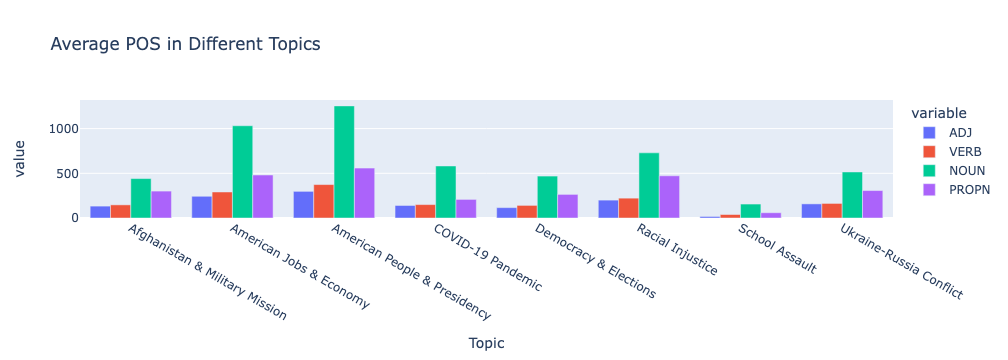

In [175]:
# Use plotly to plot POS use per speaker
fig = px.bar(average_pos_df, x="Topic", y=["ADJ", 'VERB', "NOUN", "PROPN"], title="Average POS in Different Topics", barmode='group')
fig.show()

Compared with the counts of POS above, using percentages of POS instead of counts can provide a more accurate representation of the distribution of POS in different speech, especially when analyzing texts of varying lengths. Percentages take into account the total number of words in a given text, which allows for a more meaningful comparison across texts of different lengths.

In [177]:
# Define a function to get part-of-speech tags and counts and append them to a new dictionary
def get_pos_tags(doc):
    dictionary = {}
    num_pos = doc.count_by(spacy.attrs.POS)
    total_count = sum(num_pos.values())  # Calculate total count of POS tags
    for k, v in sorted(num_pos.items()):
        dictionary[doc.vocab[k].text] = (v / total_count) * 100  # Calculate percentage
    return dictionary

# Convert float values in 'Doc' column to strings
pos_analysis_df['Doc'] = pos_analysis_df['Doc'].astype(str)

# Apply the function to each doc object in DataFrame
pos_analysis_df['POS_Counts'] = pos_analysis_df['Doc'].apply(lambda doc: get_pos_tags(nlp(doc)))

# Create a new dataframe with part-of-speech counts
pos_counts = pd.DataFrame(pos_analysis_df['POS_Counts'].tolist())

# Add the 'Topic' column to the dataframe from pos_analysis_df
pos_counts['Topic'] = pos_analysis_df['Topic']

# Get the average POS counts used in each speech
average_pos_df = pos_counts.groupby('Topic').mean().round(2)

# Reset index to improve DataFrame readability
average_pos_df = average_pos_df.reset_index()

average_pos_df

,Topic,ADJ,ADP,ADV,AUX,DET,INTJ,NOUN,NUM,PROPN,PUNCT,VERB,X,PRON,SCONJ,CCONJ,SYM,PART
0,Afghanistan & Military Mission,12.46,0.27,2.57,0.25,0.68,0.12,40.60,1.80,27.18,0.18,13.40,0.09,0.39,0.07,0.15,0.07,NaN
1,American Jobs & Economy,11.30,0.27,1.20,0.17,0.22,0.03,47.66,2.90,22.71,0.30,13.45,0.11,0.35,0.07,0.08,0.04,NaN
2,American People & Presidency,11.37,0.19,1.53,0.04,0.19,0.11,47.84,2.67,21.29,0.04,14.27,0.08,0.23,0.04,0.08,NaN,0.04
3,COVID-19 Pandemic,12.10,0.10,1.30,NaN,0.29,0.08,50.65,3.34,18.40,0.17,13.03,0.20,0.10,0.08,0.44,NaN,NaN
4,Democracy & Elections,11.59,0.40,1.59,0.23,0.38,0.10,45.05,1.01,25.46,0.29,13.53,0.14,0.37,0.13,0.14,0.13,NaN
5,Racial Injustice,11.76,0.18,1.35,0.18,0.06,0.12,42.88,1.94,27.76,0.18,13.06,NaN,0.35,0.12,0.06,NaN,NaN
6,School Assault,5.88,0.69,1.38,NaN,0.35,NaN,53.98,2.42,20.42,0.35,13.49,NaN,0.35,NaN,0.69,NaN,NaN
7,Ukraine-Russia Conflict,13.10,0.26,1.40,0.16,0.30,0.11,42.99,1.30,26.17,0.14,13.74,0.10,0.32,0.14,0.08,0.08,0.07


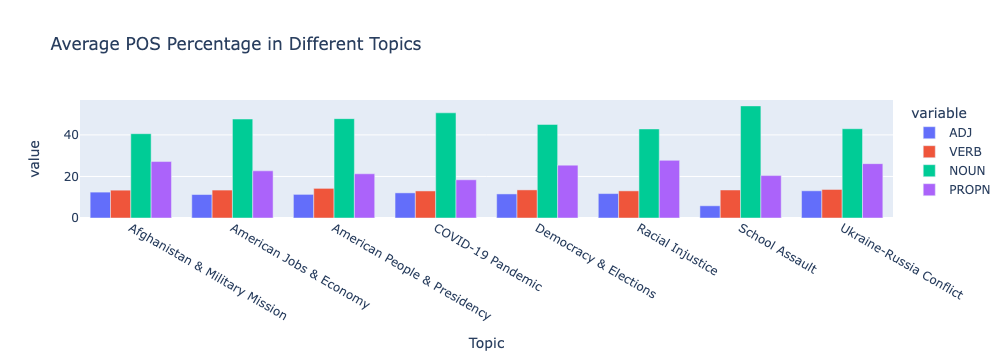

In [178]:
# Use plotly to plot POS use per speaker
fig = px.bar(average_pos_df, x="Topic", y=["ADJ", 'VERB', "NOUN", "PROPN"], title="Average POS Percentage in Different Topics", barmode='group')
fig.show()

In this plot, you can see the distribution of POS in speeches focuing on different topics. 

In [179]:
# Create new DataFrame for analysis purposes
ner_analysis_df = df[['Title','Topic', 'Named_Entities', 'NER_Words']]

In [180]:
# Convert named entity lists to strings so we can count specific entities
ner_analysis_df['Named_Entities'] = ner_analysis_df['Named_Entities'].apply(lambda x: ' '.join(x))

# Get the number of each type of entity in each paper
person_counts = ner_analysis_df['Named_Entities'].str.count('PERSON')
institution_counts = ner_analysis_df['Named_Entities'].str.count('ORG')
nation_politic_counts = ner_analysis_df['Named_Entities'].str.count('NORP')
event_counts = ner_analysis_df['Named_Entities'].str.count('EVENT')
law_counts = ner_analysis_df['Named_Entities'].str.count('LAW')
Countries_counts = ner_analysis_df['Named_Entities'].str.count('GPE')


# Append named entity counts to new DataFrame
ner_counts_df = pd.DataFrame()
ner_counts_df['Topic'] = ner_analysis_df["Topic"]
ner_counts_df['PERSON_Counts'] = person_counts
ner_counts_df['ORG_Counts'] = institution_counts
ner_counts_df['NORP_Counts'] = nation_politic_counts
ner_counts_df['EVENT_Counts'] = event_counts
ner_counts_df['LAW_Counts'] = law_counts
ner_counts_df['GPE_counts'] = Countries_counts

ner_counts_df = ner_counts_df.groupby(['Topic']).mean()

In [181]:
ner_counts_df.reset_index()

,Topic,PERSON_Counts,ORG_Counts,NORP_Counts,EVENT_Counts,LAW_Counts,GPE_counts
0,Afghanistan & Military Mission,14.0,39.000000,33.333333,0.666667,0.000000,40.666667
1,American Jobs & Economy,36.0,54.600000,56.400000,1.200000,1.000000,46.000000
2,American People & Presidency,54.0,70.000000,45.000000,1.000000,1.000000,55.000000
3,COVID-19 Pandemic,13.0,20.000000,23.000000,1.500000,0.000000,8.500000
4,Democracy & Elections,15.0,19.666667,22.000000,1.666667,2.666667,18.666667
5,Racial Injustice,47.0,43.000000,32.000000,0.000000,0.000000,16.000000
6,School Assault,2.0,1.000000,2.000000,0.000000,0.000000,3.000000
7,Ukraine-Russia Conflict,24.2,44.800000,27.000000,1.000000,0.800000,47.400000


In [182]:
# Calculate average usage of each named entity type
average_ner_df = ner_counts_df.groupby(['Topic']).mean()
average_ner_df = average_ner_df.round(0)
average_ner_df = average_ner_df.reset_index()
average_ner_df

,Topic,PERSON_Counts,ORG_Counts,NORP_Counts,EVENT_Counts,LAW_Counts,GPE_counts
0,Afghanistan & Military Mission,14.0,39.0,33.0,1.0,0.0,41.0
1,American Jobs & Economy,36.0,55.0,56.0,1.0,1.0,46.0
2,American People & Presidency,54.0,70.0,45.0,1.0,1.0,55.0
3,COVID-19 Pandemic,13.0,20.0,23.0,2.0,0.0,8.0
4,Democracy & Elections,15.0,20.0,22.0,2.0,3.0,19.0
5,Racial Injustice,47.0,43.0,32.0,0.0,0.0,16.0
6,School Assault,2.0,1.0,2.0,0.0,0.0,3.0
7,Ukraine-Russia Conflict,24.0,45.0,27.0,1.0,1.0,47.0


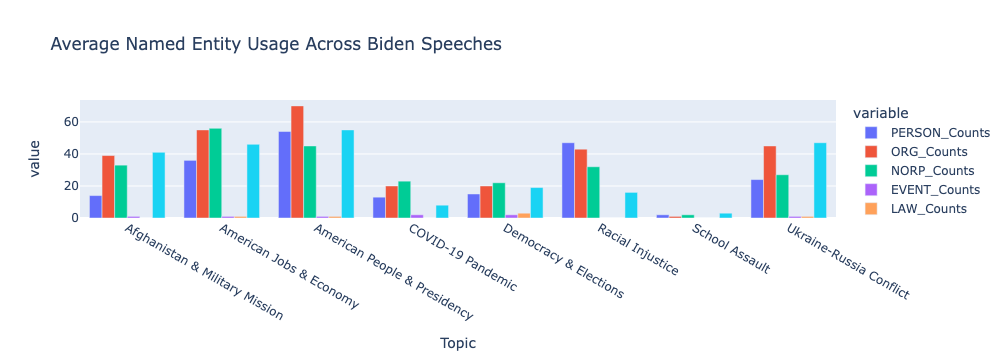

In [183]:
# Use plotly to plot proper noun use per genre
fig = px.bar(average_ner_df, x="Topic", y=["PERSON_Counts", 'ORG_Counts', "NORP_Counts", 'EVENT_Counts', 'LAW_Counts','GPE_counts'], title="Average Named Entity Usage Across Biden Speeches", barmode='group')
fig.show()

Similar to the POS, when comparing counts of named entities, longer speeches will generally have higher counts simply because they contain more text. However, this does not necessarily reflect the relative importance or emphasis placed on a particular named entity within a speech. Therefore, using ratios instead of counts allows for a more meaningful comparison of the frequency of named entities across speeches. By calculating ratios, we account for the length of each speech and normalize the entity counts accordingly. This allows us to compare the relative prominence of different named entities within each speech.

In [184]:
# Get the length of speech
speech_lengths = df['Tokens'].apply(len)

# Get the number of each type of entity in each paper
person_counts = ner_analysis_df['Named_Entities'].str.count('PERSON')
institution_counts = ner_analysis_df['Named_Entities'].str.count('ORG')
nation_politic_counts = ner_analysis_df['Named_Entities'].str.count('NORP')
event_counts = ner_analysis_df['Named_Entities'].str.count('EVENT')
law_counts = ner_analysis_df['Named_Entities'].str.count('LAW')
GPE_counts = ner_analysis_df['Named_Entities'].str.count('GPE')


# Calculate entity ratios based on speech length
person_ratios = person_counts / speech_lengths
institution_ratios = institution_counts / speech_lengths
nation_politic_ratios = nation_politic_counts / speech_lengths
event_ratios = event_counts / speech_lengths
law_ratios = law_counts / speech_lengths
GPE_ratios = GPE_counts / speech_lengths


# Append named entity counts and ratios to new DataFrame
ner_counts_df = pd.DataFrame()
ner_counts_df['Topic'] = ner_analysis_df["Topic"]
ner_counts_df['PERSON_Ratios'] = person_ratios
ner_counts_df['ORG_Ratios'] = institution_ratios
ner_counts_df['NORP_Ratios'] = nation_politic_ratios
ner_counts_df['EVENT_Ratios'] = event_ratios
ner_counts_df['LAW_Ratios'] = law_ratios
ner_counts_df['GPE_Ratios'] = GPE_ratios


#ner_counts_df = ner_counts_df.groupby(['Topic']).sum()
ner_counts_df.head(1)

,Topic,PERSON_Ratios,ORG_Ratios,NORP_Ratios,EVENT_Ratios,LAW_Ratios,GPE_Ratios
0,Ukraine-Russia Conflict,0.000852,0.002055,0.002005,0.0,0.0,0.002606


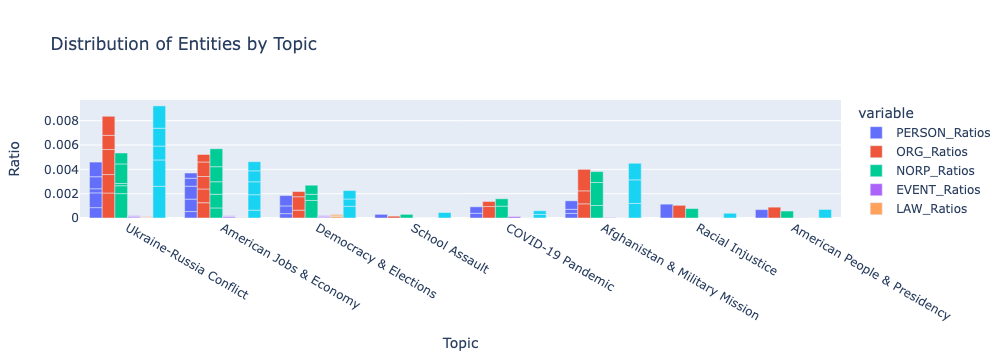

In [186]:
fig = px.bar(ner_counts_df, x='Topic', y=['PERSON_Ratios', 'ORG_Ratios', 'NORP_Ratios', 'EVENT_Ratios', 'LAW_Ratios', 'GPE_Ratios'],
                labels={'Topic': 'Topic', 'value': 'Ratio'}, title='Distribution of Entities by Topic', barmode='group')
fig.show()

In this polt, you can see the distribution of various NER in speeches focusing on different topics.

In [187]:
# Define function to extract words tagged as "PERSON" named entities from doc objects
def extract_person_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'PERSON']

# Get all PERSON entity words and apply to new column of DataFrame
ner_analysis_df['PERSON_Named_Entities'] = df['Doc'].apply(extract_person_named_entities)


# Make list of PERSON entities a string so we can count their frequencies
ner_analysis_df['PERSON_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['PERSON_Named_Entities']]

In [188]:
# Define function to extract words tagged as "ORG" named entities from doc objects
def extract_person_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'ORG']

# Get all PERSON entity words and apply to new column of DataFrame
ner_analysis_df['ORG_Named_Entities'] = df['Doc'].apply(extract_person_named_entities)


# Make list of PERSON entities a string so we can count their frequencies
ner_analysis_df['ORG_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['ORG_Named_Entities']]

In [189]:
# Define function to extract words tagged as "NATION" named entities from doc objects
def extract_NATION_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'NORP']

# Get all NATION entity words and apply to new column of DataFrame
ner_analysis_df['NORP_Named_Entities'] = df['Doc'].apply(extract_NATION_named_entities)


# Make list of NATION entities a string so we can count their frequencies
ner_analysis_df['NORP_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['NORP_Named_Entities']]

In [190]:
# Define function to extract words tagged as "EVENT" named entities from doc objects
def extract_event_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'EVENT']

# Get all EVENT entity words and apply to new column of DataFrame
ner_analysis_df['EVENT_Named_Entities'] = df['Doc'].apply(extract_event_named_entities)


# Make list of EVENT entities a string so we can count their frequencies
ner_analysis_df['EVENT_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['EVENT_Named_Entities']]

In [191]:
# Define function to extract words tagged as "LAW" named entities from doc objects
def extract_law_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'LAW']

# Get all LAW entity words and apply to new column of DataFrame
ner_analysis_df['LAW_Named_Entities'] = df['Doc'].apply(extract_law_named_entities)


# Make list of LAW entities a string so we can count their frequencies
ner_analysis_df['LAW_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['LAW_Named_Entities']]

In [192]:
# Define function to extract words tagged as "GPE" named entities from doc objects
def extract_GPE_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'GPE']

# Get all GPE entity words and apply to new column of DataFrame
ner_analysis_df['GPE_Named_Entities'] = df['Doc'].apply(extract_GPE_named_entities)


# Make list of GPE entities a string so we can count their frequencies
ner_analysis_df['GPE_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['GPE_Named_Entities']]

In [193]:
ner_analysis_df.head(2)

,Title,Topic,Named_Entities,NER_Words,PERSON_Named_Entities,ORG_Named_Entities,NORP_Named_Entities,EVENT_Named_Entities,LAW_Named_Entities,GPE_Named_Entities
0,"October 20, 2023: Remarks on the US Response i...",Ukraine-Russia Conflict,TIME NORP DATE TIME GPE NORP NORP ORG CARDINAL...,"[(evening), (Americans), (future, decade), (mo...","Abbas, Putin, Putin, Putin, Putin, Netanyahu, ...","Hamas, Hamas, Hamas, Palestinian Authority, Un...","Americans, american, Israelis, american, Israe...",,,"Israel, Israel, Israel, Israel, Russia, Israel..."
1,"February 21, 2023: Remarks on the One-Year Ann...",Ukraine-Russia Conflict,GPE PERSON NORP ORG ORG PERSON GPE EVENT CARDI...,"[(Poland), (Duda), (polish), (PolandYou), (Roy...","Duda, Vladimir Putin, Zelenskyy Kyiv, Putin, P...","PolandYou, Royal Castle Warsaw, Finlandization...","polish, russian, russian, russian, american, a...","Europe War, Orange Revolution Revolution Dignity",Article 5,"Poland, Ukraine, Russia, Ukraine, America, Ukr..."


#### Most common words of specifc NE of certain topics

In [203]:
# Select the speeches focusing on certain topics 
filtered_df = ner_analysis_df[ner_analysis_df['Topic'] == "Racial Injustice"]

# Count the frequency of each word in the filtered data and append to list
word_frequencies = filtered_df.NORP_Named_Entities.str.split(",",expand=True).stack().value_counts()

# Get the most common words and their frequencies
word_frequencies.head()

 american           9
 Americans          6
 irish              2
 italian            1
 asian Americans    1
Name: count, dtype: int64

In Biden's speech about racial injustice, he mentions various NORP entities (nationalities, etc.) such as Americans, Irish, Italian, and Asian Americans. These mentions perhaps indicate a focus on the experiences and struggles faced by different ethnic groups within the United States. 

In [200]:
filtered_df = ner_analysis_df[ner_analysis_df['Topic'] == "American Jobs & Economy"]

word_frequencies = filtered_df.ORG_Named_Entities.str.split(",",expand=True).stack().value_counts()

word_frequencies.head()

 Congress                27
 American Rescue Plan     9
 Medicare                 9
 Senate                   8
 ApplauseAnd              7
Name: count, dtype: int64

The ORG entities (companies, agencies, institutions, etc.) indicates that the topic American Jobs & Economy is likely centered around legislative and policy actions related to economic recovery and job creation. 'Congress,' 'Senate,' and the 'American Rescue Plan' might suggest a focus on government initiatives and legislation aimed at stimulating the economy and providing relief to businesses and individuals affected by the COVID-19 pandemic. The mention of 'Medicare' may indicate a discussion on healthcare and its role in supporting the economy. 

In [212]:
filtered_df = ner_analysis_df[ner_analysis_df['Topic'] == "COVID-19 Pandemic"]

word_frequencies = filtered_df.GPE_Named_Entities.str.split(",",expand=True).stack().value_counts()

word_frequencies.head()

 America    9
America     2
 China      1
 Russia     1
 againas    1
Name: count, dtype: int64

The GPE entities (countries, cities, etc.) in Biden's speech about the COVID-19 pandemic suggests that the topic is likely focused on the global impact of the virus and the response efforts of different countries. There is a focus on the United States and its experiences, challenges, and strategies in dealing with the pandemic. The mention of China and Russia might suggest a potential discussion on the international aspects of the pandemic.

In [214]:
# To check the context of the distribution of NER, you can follow the step below:

# Extract the first Doc object
doc = df['Doc'][0]

# Visualize named entity tagging in a single paper
displacy.render(doc, style='ent', jupyter=True)

# ACTIVE EXERCISE
You can always revisit the tutorial book to review any unfamiliar steps at any time.

## 1. Creating Your Own Dataset
On the Miller Center website, select a president of your interest to proceed with the following exercises.
You can choose to use Miller Center API or web scraping to do this.

#### Libraries
1. [Requests](https://pypi.org/project/requests/)
2. [BeautifulSoup](https://pypi.org/project/beautifulsoup4/)

### Miller Center API

In [ ]:
# Import necessary libraries
import pandas as pd
import requests

Making a POST request to the API endpoint to get the JSON object of the data.

In [ ]:
endpoint = ... # Write your code here
r = requests.post(url=endpoint)
data = r.json()
items = data['Items']

Then, we want to check if there are more items to retrieve. 

In [ ]:
while ... # Write your code here
    r = requests.post(url=endpoint, ...)
    data = r.json()
    items += data['Items']

Extract the title, president, date, and transcript. 

In [ ]:
speeches = []
for item in items:
    ... # Write your code here
    speech = ...
    speeches.append(speech)

Then, we create a DataFrame.

In [ ]:
df = pd.DataFrame(speeches)

Finally, save the CSV file.

In [ ]:
df.to_csv(...# Write your code here)

### Web Scraping

In [ ]:
# Import necessary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

Define a class, and name it PresidentialSpeechExercise.

Initialize the class, define the basic URL, create the president_id, president_name, and speech_data_list in order to transfer or receive data later.

In [ ]:
class  PresidentialSpeechScraperExercise:
  def __init__(self, president_id, president_name):... # Write your code here

Well done!

Now we want to know more information of the presidential speeches.

So, define a function to scrape the link of the speeches.

In [ ]:
def scrape_speech_links(self):... # Write your code here

We can scrape more details in every speeches.

In [ ]:
def scrape_speech_details(self):... # Write your code here

Connect all the texts in 'div' and delete the possible 'Transcript' in texts/.

In [ ]:
speech = '\n'.join()# Insert your code here

Now, we could add the information extracted from the speech details to the dictionary separately.

In [ ]:
speech_data.update({
    'Title': title,
    'President': president,
    'Date': date,
    'Summary': summary,
    'Transcript': transcript
})

In [ ]:
def save_to_csv(self):
  filename= f"{self.president_name}_presidential_speeches_exercise.csv"
  df = pd.DataFrame(self.speech_data_list)
  df.to_csv(filename, index=False)
  print(f"Speech data saved to {filename}")

Example of create an instance of Biden for the class of PresidentialSpeechScraper.
```
Biden_scraper = PresidentialSpeechScraper(president_id=30721, president_name ='Biden')

Biden_scraper.scrape_speech_links()
Biden_scraper.scrape_speech_details()

Biden_scraper.save_to_csv()
``

In [ ]:
# Write your code here

Don't forget to save your data.

As the web pages of different presidents might be sightly different, you can use the following code to check the HTML element for links or speech details. 

In [ ]:
url = "..." # paste your link here
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
soup

## 2. Preprocess Your Data

You can view your data by running this code.

In [ ]:
df = pd.read_csv(...)# Insert your code here
df.head()

Cleaning data is an essential step in data analysis. This is a critical process that improve data quality, ensuring accuracy in analysis, facilitating the construction of high-performance models, and ultimately supporting well-informed decision-making by eliminating errors, inconsistencies, and improving overall data integrity.

We use the library "re" to clean the data:

In [ ]:
import re

First, we define a function to remove non-alphanumeric characters, newlines, carriage returns, and multiple consecutive spaces.

In [ ]:
def clean_text(text):
  # Remove non-alphanumeric characters
  cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    ...
  # Write the rest of the code here

Then, we apply the cleaning function to a DataFrame column (Speech)

In [ ]:
df['Transcript'] = df['Transcript'].apply(clean_text)

Standardize the Date

In [2]:
# Your code

Then, you might want to lemmatize the transcripts for further analysis

In [ ]:
# install and import spaCy library
!pip install spaCy
!pip install plotly
!pip install nbformat==5.1.2
import spacy

Install English language model.

In [3]:
!spacy download en_core_web_sm

Import os to upload documents and metadata.

In [ ]:
import os

Load spaCy visualizer and Import pandas DataFrame packages.

In [ ]:
from spacy import displacy
from spacy.matcher import Matcher
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

Import graphing package.

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

Load nlp popeline and check what functions it performs.

In [ ]:
nlp = spacy.load('en_core_web_sm')
print(nlp.pipe_names)

Creating Doc Objects

Define a function that runs the nlp pipeline on any given input text.
Apply the function to the "Speech" column, so that the nlp pipeline is called on each speech.

In [4]:
# Your code

Define a function to retrieve lemmas from a doc object.

In [5]:
# Your code

## 3. Come up with Your Research Questions & Analyzing the Data
Continuing with the our Biden dataset (3.2. Text Annotation - Part of Speech Tagging (POS) & Named Entity Recognition (NER))
Come up with interesting research questions related to the topics of Biden's sppeches and use the named entites to analyze it.

Define function to extract words tagged as a named entities you want to analyze from doc objects.

Get all entity words and apply to new column of DataFrame.

Make list of this entities a string so we can count their frequencies.

In [ ]:
def extract... entities(doc):
    return [ent for ent in doc.ents if ent.label_ == '...'] # write your NER here

ner_analysis_df['...'] = df['Doc'].apply(extract..._entities)

ner_analysis_df['...'] = [', '.join(map(str, l)) for l in ner_analysis_df['...']]

Choose the topic you want to analyze.

Select the speeches focusing on this topics.

Count the frequency of each word in the filtered data and append to list. 

In [ ]:
filtered_df = ner_analysis_df[ner_analysis_df['Topic'] == "..."] # write your topic here

word_frequencies = filtered_df....Entities.str.split(",",expand=True).stack().value_counts()

word_frequencies.head()

# REFERENCE 
#### Data Source
Miller Center of Public Affairs, University of Virginia. "Presidential Speeches: Downloadable Data." Accessed January 13, 2024. data.millercenter.org.
#### Literature
Neshkovska, S. (2019). Language in political speeches. In International Scientific Conference “Towards a Better Future: Democracy, EU Integration and Criminal Justice” Conference Proceedings, Volume II (Vol. 2, pp. 115-124). Faculty of Law-Kicevo, University “St. Kliment Ohridski”-Bitola.